In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

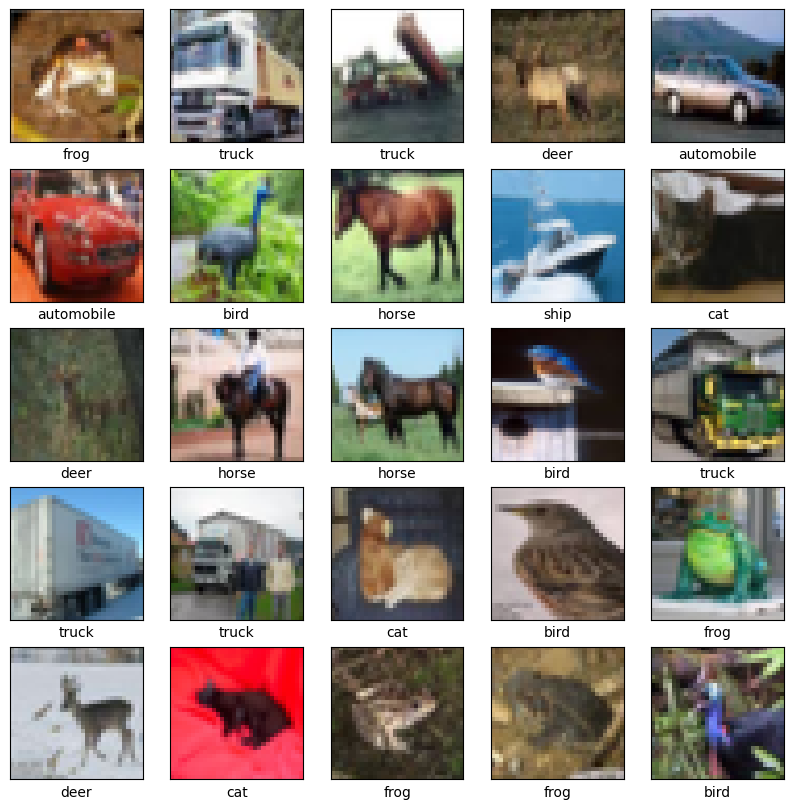

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [14]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),   # Flatten the input layer
    layers.Dense(250, activation='sigmoid'),   # First dense layer
    layers.Dense(128, activation='sigmoid'),   # Second dense layer
    layers.Dense(18, activation='sigmoid'),    # Third dense layer
    layers.Dense(10, activation='sigmoid')     # Output layer
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 250)               768250    
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 18)                2322      
                                                                 
 dense_6 (Dense)             (None, 10)                190       
                                                                 
Total params: 802890 (3.06 MB)
Trainable params: 802890 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 39s 24ms/step - loss: 2.0419 - accuracy: 0.2357 - val_loss: 1.9316 - val_accuracy: 0.2834
Epoch 2/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.9035 - accuracy: 0.2965 - val_loss: 1.9006 - val_accuracy: 0.2924
Epoch 3/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.8565 - accuracy: 0.3218 - val_loss: 1.8111 - val_accuracy: 0.3429
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.8124 - accuracy: 0.3400 - val_loss: 1.7845 - val_accuracy: 0.3647
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7761 - accuracy: 0.3560 - val_loss: 1.7859 - val_accuracy: 0.3429
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7503 - accuracy: 0.3663 - val_loss: 1.7271 - val_accuracy: 0.3792
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7262 - accuracy: 0.3779 - val_loss: 1.6939 - val_accura

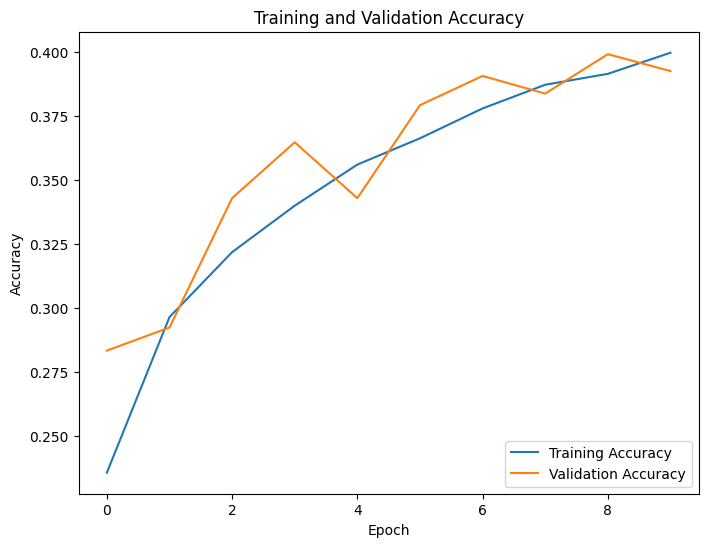

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

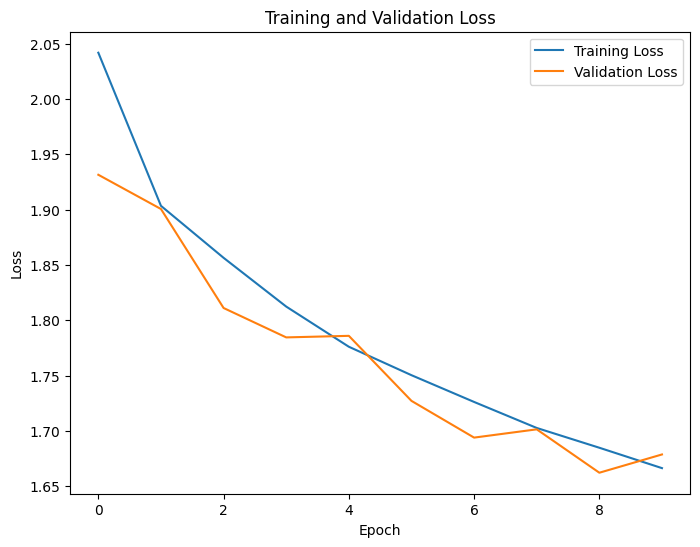

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()